# Artivatic Assignment task

## Deep Learning Model 1

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
cd drive/MyDrive/ML_Artivatic_dataset/ML_Artivatic_dataset

/content/drive/MyDrive/ML_Artivatic_dataset/ML_Artivatic_dataset


In [4]:
#Loading the required libraries
import numpy as np
import pandas as pd
import seaborn as sns

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

print(tf.__version__)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import os
import datetime

from tensorflow.keras.utils import to_categorical

2.6.0


In [5]:
df = pd.read_csv("train_indessa.csv")

In [6]:
Y = df['loan_status']

In [7]:
df.isna().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [8]:
df['desc'] = df['desc'].fillna("not mentioned")

# In the original dataset "4" indicates the pet was not adopted.
df['desc'] = np.where(df['desc'] == "not mentioned", 0, 1)



In [9]:
# Drop un-used columns.
df = df.drop(columns=['loan_amnt', 'member_id', 'funded_amnt','mths_since_last_delinq','mths_since_last_record', 'verification_status_joint', 'mths_since_last_major_derog'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


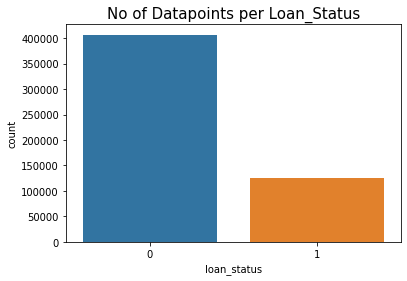

In [6]:
#Count for each labels
plt.title('No of Datapoints per Loan_Status', fontsize=15)
sns.countplot(df.loan_status)
plt.xticks()
plt.show()

Inference: We have partial imbalanced data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


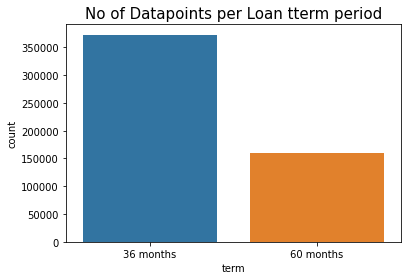

In [8]:
#Count for data points term wise
plt.title('No of Datapoints per Loan tterm period', fontsize=15)
sns.countplot(df.term)
plt.xticks()
plt.show()

In [10]:
#get the row count to put on category axis.
row  = []

for i in range(len(df['funded_amnt_inv'].to_list())):
  row.append(i)

In [10]:
#unique counts of batch set
print("Unique count of batch enrolled")
print(len(set(df['batch_enrolled'].to_list())))
print("-"*20)

print("Unique Values for grade")
print(len(set(df['grade'].to_list())))
print("-"*20)

print("Unique Values for sub grade")
print(len(set(df['sub_grade'].to_list())))
print("-"*20)

print("Unique Values of Employee title")
print(len(set(df['emp_title'].to_list())))
print("-"*20)

print("Unique Values of Emp length")
print(len(set(df['emp_length'].to_list())))
print("-"*20)

print("Unique Values of Home Ownership")
print(len(set(df['home_ownership'].to_list())))
print("-"*20)

print("Unique Values of Verification Status")
print(len(set(df['verification_status'].to_list())))
print("-"*20)

print("Unique Values of Payment plan")
print(len(set(df['pymnt_plan'].to_list())))
print("-"*20)

print("Unique Values of purpose")
print(len(set(df['purpose'].to_list())))
print("-"*20)

print("Unique Values of title")
print(len(set(df['title'].to_list())))
print("-"*20)

print("Unique Values of Payment plan")
print(len(set(df['pymnt_plan'].to_list())))
print("-"*20)

print("Unique Values of zip_code")
print(len(set(df['zip_code'].to_list())))
print("-"*20)


print("Unique Values of addr_state")
print(len(set(df['addr_state'].to_list())))
print("-"*20)


print("Unique Values of initial_list_status")
print(len(set(df['initial_list_status'].to_list())))
print("-"*20)


print("Unique Values of application_type")
print(len(set(df['application_type'].to_list())))
print("-"*20)


print("Unique Values of last_week_pay")
print(len(set(df['last_week_pay'].to_list())))
print("-"*20)

print("Unique Values of initial_list_status")
print(len(set(df['initial_list_status'].to_list())))
print("-"*20)

print("Unique Values of descr")
print(len(set(df['desc'].to_list())))
print("-"*20)

Unique count of batch enrolled
105
--------------------
Unique Values for grade
7
--------------------
Unique Values for sub grade
35
--------------------
Unique Values of Employee title
190125
--------------------
Unique Values of Emp length
12
--------------------
Unique Values of Home Ownership
6
--------------------
Unique Values of Verification Status
3
--------------------
Unique Values of Payment plan
2
--------------------
Unique Values of purpose
14
--------------------
Unique Values of title
39694
--------------------
Unique Values of Payment plan
2
--------------------
Unique Values of zip_code
917
--------------------
Unique Values of addr_state
51
--------------------
Unique Values of initial_list_status
2
--------------------
Unique Values of application_type
2
--------------------
Unique Values of last_week_pay
98
--------------------
Unique Values of initial_list_status
2
--------------------
Unique Values of descr
2
--------------------


Inference: 
1. title, employee_title, and zip codes consist of large unique values.
2. Last week pay can be converted to Interger by just having the week number.

In [102]:
#Convert the Last week pay to integer
new_set = [x.replace('th week', '') for x in df['last_week_pay'].to_list()]

new_set_ = []

for ele in new_set:
  if ele == 'NA':
    ele = None
    new_set_.append(0)
  elif ele is not None:    
    new_set_.append(int(ele))
  else:    
    new_set_.append(0)

df['last_week_pay'] = new_set_

In [11]:
#for zip codes, last two  values are hidden. So let just take first two values only and convert this to categorical feature.
from sklearn.preprocessing import OneHotEncoder

print("Sum of null values n zip code")
print(df['zip_code'].isna().sum())

zip = []
for i in df['zip_code']:
  temp = i[0:2]
  zip.append(temp)

df['zip_code'] = zip

Sum of null values n zip code
0


In [12]:
df['batch_enrolled'] = df['batch_enrolled'].fillna("not applicable")
df['emp_title'] = df['emp_title'].fillna("not applicable")
df['emp_length'] = df['emp_length'].fillna("not applicable")
df['title'] = df['title'].fillna("not applicable")

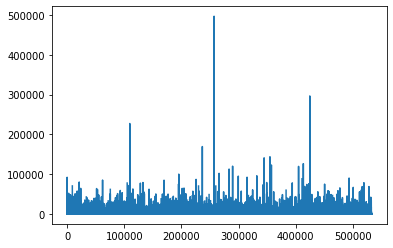

In [280]:
import matplotlib.pyplot as plt
y1 = np.asarray(df['tot_coll_amt'])
row_ = np.asarray(row)
plt.plot(row_, y1,"-")
plt.show()

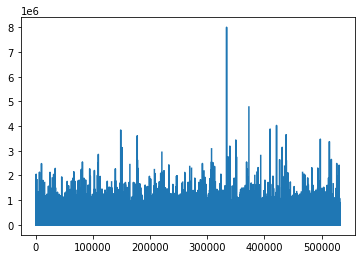

In [281]:
import matplotlib.pyplot as plt
y2 = np.asarray(df['tot_cur_bal'])
row_ = np.asarray(row)
plt.plot(row_, y2,"-")
plt.show()

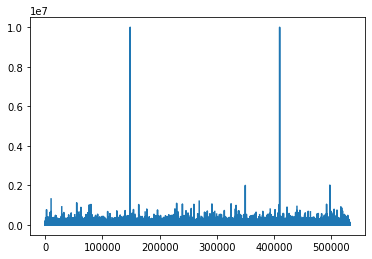

In [282]:
import matplotlib.pyplot as plt
y3 = np.asarray(df['total_rev_hi_lim'])
row_ = np.asarray(row)
plt.plot(row_, y3,"-")
plt.show()

In [105]:
#drop the label
label = df['loan_status']
df = df.drop('loan_status', 1)

#drop member_id
df = df.drop('member_id', 1)

In [106]:
#drop the desc column
#df = df.drop('desc', 1)

In [16]:
#fill the null values in title and emp_title with 'not applicable'
import re


title = []
emp_title = []


#preprcess the values in title and emp_title
for text in df['title']:
  
  if text is not None:
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    text = ' '.join(e.lower() for e in text.split())
  title.append(text)

for text in df['emp_title']:
  
  if text is not None:
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    text = ' '.join(e.lower() for e in text.split())
  emp_title.append(text)

In [17]:
#assign the preprocessed values to the columns

df['title'] = title
df['emp_title'] = emp_title

In [18]:
df[(df['tot_coll_amt'].isna())&(df['tot_cur_bal'].isna())&(df['total_rev_hi_lim'].isna())].shape

(42004, 37)

In [19]:

df['tot_coll_amt'] = df['tot_coll_amt'].fillna(-1)
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(-1)
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(-1)

In [20]:
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(-1)
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(-1)
df['open_acc'] = df['open_acc'].fillna(-1)

df['pub_rec'] = df['pub_rec'].fillna(-1)
df['revol_util'] = df['revol_util'].fillna(-1)
df['total_acc'] = df['total_acc'].fillna(-1)

df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(-1)
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(-1)

In [24]:
print("Print the count of NULL values for all the columns\n")
print(df.isna().sum())

Print the count of NULL values for all the columns

funded_amnt_inv               0
term                          0
batch_enrolled                0
int_rate                      0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
desc                          0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_

Initial Observation: 
1. emp_length, batch_enrolled, and verification_status_joint have null values which we can replace with 'not applicable'
2. The remaining columns where NULL value exists are the numerical columns which we would need to analyze for filling the mising values

In [110]:
# 1. Filling the missing values in categorical column
"""
df['emp_length'] = df['emp_length'].fillna("not applicable")
df['batch_enrolled'] = df['batch_enrolled'].fillna("not applicable")
df['verification_status_joint'] = df['verification_status_joint'].fillna("not applicable")
"""

In [22]:
#Analyzing missing values for annaul_income
df[df['annual_inc'].isna()]

,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
170053,0.0,36 months,BAT2331079,8.38,A,A5,not applicable,< 1 year,NONE,NaN,Not Verified,n,1,other,buying a car,10,NY,4.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,f,873.83,0.0,0.0,0.0,-1.0,INDIVIDUAL,157th week,-1.0,-1.0,-1.0,-1.0
198875,3450.0,36 months,BAT4347689,7.75,A,A3,not applicable,< 1 year,NONE,NaN,Not Verified,n,1,other,education,10,NY,1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,f,867.53,0.0,0.0,0.0,-1.0,INDIVIDUAL,157th week,-1.0,-1.0,-1.0,-1.0
402854,6700.0,36 months,not applicable,7.75,A,A3,not applicable,< 1 year,NONE,NaN,Not Verified,n,1,other,moving expenses and security deposit,10,NY,1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,f,830.42,0.0,0.0,0.0,-1.0,INDIVIDUAL,157th week,-1.0,-1.0,-1.0,-1.0


Inference:
1. There are total of three rows where annual income is NaN.
2. Annual Income is an important field in this problem.
3. Funded amount lies between 6500 and 7000 for these NaN values.
4. Fill the missing values with the average income of people who were funded between 6500 and 7000

In [23]:
#Fill the missing values with the average income of people who were funded between 6500 and 7000
mean_ann_inc = (df[(df['funded_amnt_inv'] >= 6500) & (df['funded_amnt_inv'] <= 7000)]['annual_inc']).mean()

df['annual_inc'] = df['annual_inc'].fillna(mean_ann_inc)

In [113]:
# analyzing tot_coll_amt, tot_cur_bal, total_rev_hi_lim columns
# tot_coll_amt = total collection amount ever owed
# tot_cur_bal = total current balance of all accounts
# total_rev_hi_lim = total revolving credit limit
# The count of NaN values for these columns is same.

df[(df['tot_coll_amt'].isna())].head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,descr
21,12400,12400,12400.0,36 months,BAT1135695,6.62,A,A2,expeditors,2 years,OWN,40000.0,Not Verified,n,debt_consolidation,debt consolidation,11,NY,20.31,0.0,2.0,28.0,NaN,6.0,0.0,1804.0,12.2,9.0,f,0.00,0.00,712.76,7.0300,0.0,NaN,INDIVIDUAL,not applicable,0,0.0,NaN,NaN,NaN,1
47,20000,20000,19725.0,36 months,,13.67,B,B5,credit suisse,4 years,RENT,168000.0,Verified,n,debt_consolidation,grateful getting out of debt for good,10,NY,22.32,0.0,0.0,41.0,NaN,5.0,0.0,24080.0,80.0,19.0,f,4255.21,68.04,750.11,134.7958,0.0,NaN,INDIVIDUAL,not applicable,135,0.0,NaN,NaN,NaN,1
66,16000,16000,15975.0,36 months,not applicable,6.03,A,A1,merrill lynch,4 years,MORTGAGE,75000.0,Verified,n,small_business,business funding,77,TX,4.83,0.0,0.0,NaN,NaN,6.0,0.0,1079.0,2.9,8.0,f,1438.43,0.00,0.00,0.0000,0.0,NaN,INDIVIDUAL,not applicable,117,0.0,NaN,NaN,NaN,1
67,35000,35000,34975.0,36 months,BAT3943761,19.72,D,D5,not applicable,10+ years,MORTGAGE,140000.0,Verified,n,small_business,business,19,PA,30.35,0.0,1.0,36.0,NaN,16.0,0.0,88474.0,80.1,47.0,f,11640.25,0.00,0.00,0.0000,0.0,NaN,INDIVIDUAL,not applicable,156,0.0,NaN,NaN,NaN,1
74,1000,1000,1000.0,36 months,BAT3943761,12.12,B,B3,nfi industries,8 years,RENT,40000.0,Verified,n,vacation,vacation,43,OH,31.77,0.0,0.0,NaN,NaN,12.0,0.0,15686.0,93.4,21.0,f,197.41,0.00,0.00,0.0000,0.0,NaN,INDIVIDUAL,not applicable,156,0.0,NaN,NaN,NaN,1


In [114]:
#total count where tot_coll_amt = 0
df[df['tot_coll_amt']==0].shape

(420903, 43)

In [115]:
# large section of values for this column is 0, so we can fill the missing value in this column with this value.
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0)

In [ ]:
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0)
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(tot_cur_bal_median)


In [116]:
#total count where tot_cur_bal = 0
df[df['tot_cur_bal']==0].shape[0]

78

In [117]:
#print mean, max, and min for tot_cur_bal
print("Mean")
print(df['tot_cur_bal'].mean())
print("\nMax")
print(df['tot_cur_bal'].max())
print("\nMin")
print(df['tot_cur_bal'].min())
print("\nMedian")
print(df['tot_cur_bal'].median())

Mean
139554.1107918862

Max
8000078.0

Min
0.0

Median
80669.5


In [118]:
# fill the missing values tot_cur_bal_median with the median
tot_cur_bal_median = df['tot_cur_bal'].median()
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(tot_cur_bal_median)
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(total_rev_hi_lim_median)

In [119]:
#print mean, max, and min for total_rev_hi_lim
print("Mean")
print(df['total_rev_hi_lim'].mean())
print("\nMax")
print(df['total_rev_hi_lim'].max())
print("\nMin")
print(df['total_rev_hi_lim'].min())
print("\nMedian")
print(df['total_rev_hi_lim'].median())

Mean
32080.572918535796

Max
9999999.0

Min
0.0

Median
23700.0


In [120]:
# fill the missing values of total_rev_hi_lim with the median
total_rev_hi_lim_median = df['total_rev_hi_lim'].median()
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(total_rev_hi_lim_median)

In [121]:
#mths_since_last_delinq, mths_since_last_record, and  mths_since_last_major_derog columns have large NULL values.
print(df['mths_since_last_delinq'].min())
print(df['mths_since_last_record'].min())
print(df['mths_since_last_major_derog'].min())

0.0
0.0
0.0


In [122]:
# Replacing their NaN values with min value (which is 0)

df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(0)

df['mths_since_last_record'] = df['mths_since_last_record'].fillna(0)

df['mths_since_last_major_derog'] = df['mths_since_last_major_derog'].fillna(0)

In [123]:
#Replacing the NaN values of the remaining columns with their meadian value.

median = df['delinq_2yrs'].median()
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(median)

median = df['inq_last_6mths'].median()
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(median)

median = df['open_acc'].median()
df['open_acc'] = df['open_acc'].fillna(median)

median = df['pub_rec'].median()
df['pub_rec'] = df['pub_rec'].fillna(median)

median = df['revol_util'].median()
df['revol_util'] = df['revol_util'].fillna(median)

median = df['total_acc'].median()
df['total_acc'] = df['total_acc'].fillna(median)

median = df['collections_12_mths_ex_med'].median()
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(median)

median = df['acc_now_delinq'].median()
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(median)

In [25]:
#perform the train test split.
X_train, X_test,Y_train, Y_test = train_test_split(df, Y, stratify = Y, train_size = 0.9)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, stratify = Y_train, train_size = 0.7)

In [26]:
#Featurize the title and emp_title features.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_title = CountVectorizer(max_features = 10)
X_train_title = vectorizer_title.fit_transform(X_train['title'])
X_cv_title = vectorizer_title.transform(X_cv['title'])
X_test_title = vectorizer_title.transform(X_test['title'])


vectorizer_emp_title = CountVectorizer(max_features = 20)
X_train_emp_title = vectorizer_emp_title.fit_transform(X_train['emp_title'])
X_cv_emp_title = vectorizer_emp_title.transform(X_cv['emp_title'])
X_test_emp_title = vectorizer_emp_title.transform(X_test['emp_title'])


In [27]:
term = np.array(X_train['term']).reshape((len(X_train['term']),1))
batch_enrolled = np.array(X_train['batch_enrolled']).reshape((len(X_train['batch_enrolled']),1))
grade = np.array(X_train['grade']).reshape((len(X_train['grade']),1))
sub_grade = np.array(X_train['sub_grade']).reshape((len(X_train['sub_grade']),1))
emp_length = np.array(X_train['emp_length']).reshape((len(X_train['emp_length']),1))
home_ownership = np.array(X_train['home_ownership']).reshape((len(X_train['home_ownership']),1))
verification_status = np.array(X_train['verification_status']).reshape((len(X_train['verification_status']),1))
pymnt_plan = np.array(X_train['pymnt_plan']).reshape((len(X_train['pymnt_plan']),1))
purpose = np.array(X_train['purpose']).reshape((len(X_train['purpose']),1))
zip_code = np.array(X_train['zip_code']).reshape((len(X_train['zip_code']),1))
addr_state = np.array(X_train['addr_state']).reshape((len(X_train['addr_state']),1))
application_type = np.array(X_train['application_type']).reshape((len(X_train['application_type']),1))
#verification_status_joint = np.array(X_train['verification_status_joint']).reshape((len(X_train['verification_status_joint']),1))
initial_list_status = np.array(X_train['initial_list_status']).reshape((len(X_train['initial_list_status']),1))
descr = np.array(X_train['desc']).reshape((len(X_train['desc']),1))

term_cv = np.array(X_cv['term']).reshape((len(X_cv['term']),1))
batch_enrolled_cv = np.array(X_cv['batch_enrolled']).reshape((len(X_cv['batch_enrolled']),1))
grade_cv = np.array(X_cv['grade']).reshape((len(X_cv['grade']),1))
sub_grade_cv = np.array(X_cv['sub_grade']).reshape((len(X_cv['sub_grade']),1))
emp_length_cv = np.array(X_cv['emp_length']).reshape((len(X_cv['emp_length']),1))
home_ownership_cv = np.array(X_cv['home_ownership']).reshape((len(X_cv['home_ownership']),1))
verification_status_cv = np.array(X_cv['verification_status']).reshape((len(X_cv['verification_status']),1))
pymnt_plan_cv = np.array(X_cv['pymnt_plan']).reshape((len(X_cv['pymnt_plan']),1))
purpose_cv = np.array(X_cv['purpose']).reshape((len(X_cv['purpose']),1))
zip_code_cv = np.array(X_cv['zip_code']).reshape((len(X_cv['zip_code']),1))
addr_state_cv = np.array(X_cv['addr_state']).reshape((len(X_cv['addr_state']),1))
application_type_cv = np.array(X_cv['application_type']).reshape((len(X_cv['application_type']),1))
#verification_status_joint_cv = np.array(X_cv['verification_status_joint']).reshape((len(X_cv['verification_status_joint']),1))
initial_list_status_cv = np.array(X_cv['initial_list_status']).reshape((len(X_cv['initial_list_status']),1))
descr_cv = np.array(X_cv['desc']).reshape((len(X_cv['desc']),1))


term_test = np.array(X_test['term']).reshape((len(X_test['term']),1))
batch_enrolled_test = np.array(X_test['batch_enrolled']).reshape((len(X_test['batch_enrolled']),1))
grade_test = np.array(X_test['grade']).reshape((len(X_test['grade']),1))
sub_grade_test = np.array(X_test['sub_grade']).reshape((len(X_test['sub_grade']),1))
emp_length_test = np.array(X_test['emp_length']).reshape((len(X_test['emp_length']),1))
home_ownership_test = np.array(X_test['home_ownership']).reshape((len(X_test['home_ownership']),1))
verification_status_test = np.array(X_test['verification_status']).reshape((len(X_test['verification_status']),1))
pymnt_plan_test = np.array(X_test['pymnt_plan']).reshape((len(X_test['pymnt_plan']),1))
purpose_test = np.array(X_test['purpose']).reshape((len(X_test['purpose']),1))
zip_code_test = np.array(X_test['zip_code']).reshape((len(X_test['zip_code']),1))
addr_state_test = np.array(X_test['addr_state']).reshape((len(X_test['addr_state']),1))
application_type_test = np.array(X_test['application_type']).reshape((len(X_test['application_type']),1))
#verification_status_joint_test = np.array(X_test['verification_status_joint']).reshape((len(X_test['verification_status_joint']),1))
initial_list_status_test = np.array(X_test['initial_list_status']).reshape((len(X_test['initial_list_status']),1))
descr_test = np.array(X_test['desc']).reshape((len(X_test['desc']),1))


In [28]:
ohe_term = OneHotEncoder(sparse=False)
term = ohe_term.fit_transform(term)
term_cv = ohe_term.transform(term_cv)
term_test = ohe_term.transform(term_test)

ohe_batch_enrolled = OneHotEncoder(sparse=False)
batch_enrolled = ohe_batch_enrolled.fit_transform(batch_enrolled)
batch_enrolled_cv = ohe_batch_enrolled.transform(batch_enrolled_cv)
batch_enrolled_test = ohe_batch_enrolled.transform(batch_enrolled_test)

ohe_grade = OneHotEncoder(sparse=False)
grade = ohe_grade.fit_transform(grade)
grade_cv = ohe_grade.transform(grade_cv)
grade_test = ohe_grade.transform(grade_test)

ohe_sub_grade = OneHotEncoder(sparse=False)
sub_grade = ohe_sub_grade.fit_transform(sub_grade)
sub_grade_cv = ohe_sub_grade.transform(sub_grade_cv)
sub_grade_test = ohe_sub_grade.transform(sub_grade_test)

ohe_emp_length = OneHotEncoder(sparse=False)
emp_length = ohe_emp_length.fit_transform(emp_length)
emp_length_cv = ohe_emp_length.transform(emp_length_cv)
emp_length_test = ohe_emp_length.transform(emp_length_test)

ohe_home_ownership = OneHotEncoder(sparse=False)
home_ownership = ohe_home_ownership.fit_transform(home_ownership)
home_ownership_cv = ohe_home_ownership.transform(home_ownership_cv)
home_ownership_test = ohe_home_ownership.transform(home_ownership_test)

ohe_verification_status = OneHotEncoder(sparse=False)
verification_status = ohe_verification_status.fit_transform(verification_status)
verification_status_cv = ohe_verification_status.transform(verification_status_cv)
verification_status_test = ohe_verification_status.transform(verification_status_test)

ohe_pymnt_plan = OneHotEncoder(sparse=False)
pymnt_plan = ohe_pymnt_plan.fit_transform(pymnt_plan)
pymnt_plan_cv = ohe_pymnt_plan.transform(pymnt_plan_cv)
pymnt_plan_test = ohe_pymnt_plan.transform(pymnt_plan_test)

ohe_purpose = OneHotEncoder(sparse=False)
purpose = ohe_purpose.fit_transform(purpose)
purpose_cv = ohe_purpose.transform(purpose_cv)
purpose_test = ohe_purpose.transform(purpose_test)

ohe_zip_code = OneHotEncoder(sparse=False)
zip_code = ohe_zip_code.fit_transform(zip_code)
zip_code_cv = ohe_zip_code.transform(zip_code_cv)
zip_code_test = ohe_zip_code.transform(zip_code_test)

ohe_addr_state = OneHotEncoder(sparse=False)
addr_state = ohe_addr_state.fit_transform(addr_state)
addr_state_cv = ohe_addr_state.transform(addr_state_cv)
addr_state_test = ohe_addr_state.transform(addr_state_test)

ohe_application_type = OneHotEncoder(sparse=False)
application_type = ohe_application_type.fit_transform(application_type)
application_type_cv = ohe_application_type.transform(application_type_cv)
application_type_test = ohe_application_type.transform(application_type_test)


ohe_initial_list_status = OneHotEncoder(sparse=False)
initial_list_status = ohe_initial_list_status.fit_transform(initial_list_status)
initial_list_status_cv = ohe_initial_list_status.transform(initial_list_status_cv)
initial_list_status_test = ohe_initial_list_status.transform(initial_list_status_test)

ohe_descr = OneHotEncoder(sparse=False)
descr = ohe_descr.fit_transform(descr)
descr_cv = ohe_descr.transform(descr_cv)
descr_test = ohe_descr.transform(descr_test)

In [29]:
label = np.array(Y_train).reshape((len(Y_train),1))
label_cv = np.array(Y_cv).reshape((len(Y_cv),1))
label_test = np.array(Y_test).reshape((len(Y_test),1))


In [30]:
ohe_label = OneHotEncoder(sparse=False)

label = ohe_label.fit_transform(label)
label_cv = ohe_label.transform(label_cv)
label_test = ohe_label.transform(label_test)

In [31]:
X_train_title = X_train_title.toarray()
X_train_emp_title = X_train_emp_title.toarray()

In [32]:

cat = np.concatenate((term,batch_enrolled,grade,sub_grade,emp_length,home_ownership, verification_status, pymnt_plan, purpose, zip_code, addr_state, application_type, initial_list_status,descr ), axis=1)
cat_cv = np.concatenate((term_cv,batch_enrolled_cv,grade_cv,sub_grade_cv,emp_length_cv,home_ownership_cv,verification_status_cv, pymnt_plan_cv, purpose_cv, zip_code_cv, addr_state_cv, application_type_cv, initial_list_status_cv,descr_cv ), axis=1)
cat_test = np.concatenate((term_test,batch_enrolled_test,grade_test,sub_grade_test,emp_length_test,home_ownership_test, verification_status_test, pymnt_plan_test, purpose_test, zip_code_test, addr_state_test, application_type_test, initial_list_status_test,descr_test ), axis=1)

In [33]:
train = X_train[['funded_amnt_inv',
       'int_rate',
        'annual_inc', 
       'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc',  'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 
        
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       ]]

cv = X_cv[['funded_amnt_inv',
       'int_rate',
        'annual_inc', 
       'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc',  'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 
       
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       ]]

test = X_test[['funded_amnt_inv',
       'int_rate',
        'annual_inc', 
       'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc',  'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 
        
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       ]]

In [34]:
tr = np.concatenate((train,cat), axis =1)
cv = np.concatenate((cv,cat_cv), axis =1)
ts = np.concatenate((test,cat_test), axis =1)

In [35]:
label = to_categorical(Y_train)
label_cv = to_categorical(Y_cv)
label_test = to_categorical(Y_test)

In [39]:
"""
label = (Y_train)
label_cv = (Y_cv)
label_test = (Y_test)
"""

In [37]:
#Model

n_hidden1 = 64
n_hidden2 = 48
epochs = 20
n_classes = 2
batch_size = 32
# Initiliazing the sequential model
model = keras.Sequential()

# Configuring the parameters
model.add(layers.Dense(n_hidden2, activation='relu', input_shape=(tr.shape[1],), kernel_initializer='glorot_normal'))

# Configuring the parameters
model.add(layers.Dense(n_hidden2, activation='relu', kernel_initializer='glorot_normal'))

# Adding a dropout layer
model.add(layers.Dropout(0.3))


# Adding a dense output layer with relu activation
model.add(layers.Dense(n_hidden1, activation='relu', kernel_initializer='he_normal'))

# Adding a dropout layer
model.add(layers.Dropout(0.3))

# Adding a dense output layer with softmax activation
model.add(layers.Dense(2, activation='softmax'))

print (model.summary())

auc = tf.keras.metrics.AUC()

# Compiling the model
model.compile(loss= 'binary_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.AUC(100)])

# Training the model
model.fit(tr,
          label,
          batch_size=batch_size,
          validation_data=(cv, label_cv),
          epochs=5)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 48)                17472     
_________________________________________________________________
dense_5 (Dense)              (None, 48)                2352      
_________________________________________________________________
dropout_2 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                3136      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 130       
Total params: 23,090
Trainable params: 23,090
Non-trainable params: 0
__________________________________________________

## Deep Learning Model 2

In [142]:
dataframe  = pd.read_csv("train_indessa.csv")

In [157]:
dataframe['desc'].isna().sum()

0

In [156]:
dataframe['desc'] = dataframe['desc'].fillna("not mentioned")

In [162]:
# In the original dataset "4" indicates the pet was not adopted.
dataframe['descr'] = np.where(dataframe['desc'] == "not mentioned", 0, 1)

In [164]:
# Drop un-used columns.
dataframe = dataframe.drop(columns=['desc', 'member_id'])

In [179]:
# large section of values for this column is 0, so we can fill the missing value in this column with this value.
dataframe['tot_coll_amt'] = dataframe['tot_coll_amt'].fillna(0)

# fill the missing values of total_rev_hi_lim with the median
total_rev_hi_lim_median = dataframe['total_rev_hi_lim'].median()
dataframe['total_rev_hi_lim'] = dataframe['total_rev_hi_lim'].fillna(total_rev_hi_lim_median)

# Replacing their NaN values with min value (which is 0)

dataframe['mths_since_last_delinq'] = dataframe['mths_since_last_delinq'].fillna(0)

dataframe['mths_since_last_record'] = dataframe['mths_since_last_record'].fillna(0)

dataframe['mths_since_last_major_derog'] = dataframe['mths_since_last_major_derog'].fillna(0)

#Replacing the NaN values of the remaining columns with their meadian value.

median = dataframe['delinq_2yrs'].median()
dataframe['delinq_2yrs'] = dataframe['delinq_2yrs'].fillna(median)

median = dataframe['inq_last_6mths'].median()
dataframe['inq_last_6mths'] = dataframe['inq_last_6mths'].fillna(median)

median = dataframe['open_acc'].median()
dataframe['open_acc'] = dataframe['open_acc'].fillna(median)

median = dataframe['pub_rec'].median()
dataframe['pub_rec'] = dataframe['pub_rec'].fillna(median)

median = dataframe['revol_util'].median()
dataframe['revol_util'] = dataframe['revol_util'].fillna(median)

median = dataframe['total_acc'].median()
dataframe['total_acc'] = dataframe['total_acc'].fillna(median)

median = dataframe['collections_12_mths_ex_med'].median()
dataframe['collections_12_mths_ex_med'] = dataframe['collections_12_mths_ex_med'].fillna(median)

median = dataframe['acc_now_delinq'].median()
dataframe['acc_now_delinq'] = dataframe['acc_now_delinq'].fillna(median)

In [183]:
median = dataframe['tot_cur_bal'].median()
dataframe['tot_cur_bal'] = dataframe['tot_cur_bal'].fillna(median)

In [180]:
# 1. Filling the missing values in categorical column

dataframe['emp_length'] = dataframe['emp_length'].fillna("not applicable")
dataframe['batch_enrolled'] = dataframe['batch_enrolled'].fillna("not applicable")
dataframe['verification_status_joint'] = dataframe['verification_status_joint'].fillna("not applicable")

In [ ]:
#Convert the Last week pay to integer

dataframe['last_week_pay'] = dataframe['last_week_pay'].fillna(0)

new_set = [x.replace('th week', '') for x in dataframe['last_week_pay'].to_list()]

new_set_ = []
for ele in new_set:
  if ele == 0:    
    new_set_.append(0)
  elif ele =='NA':
    new_set_.append(0)
  else:    
    new_set_.append(int(ele))

dataframe['last_week_pay'] = new_set_

In [185]:
dataframe_ = dataframe

In [186]:
# Drop un-used columns.
dataframe = dataframe.drop(columns=['title', 'emp_title'])

In [196]:
#perform the train test split.
X_train, X_test = train_test_split(dataframe, stratify = dataframe['loan_status'], train_size = 0.8)
X_train, X_cv = train_test_split(X_train, stratify = X_train['loan_status'], train_size = 0.8)

In [205]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('loan_status')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [198]:
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for our feature.
  normalizer = preprocessing.Normalization(axis=None)

  # Prepare a Dataset that only yields our feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

In [199]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a StringLookup layer which will turn strings into integer indices
  if dtype == 'string':
    index = preprocessing.StringLookup(max_tokens=max_tokens)
  else:
    index = preprocessing.IntegerLookup(max_tokens=max_tokens)

  # Prepare a Dataset that only yields our feature
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Create a Discretization for our integer indices.
  encoder = preprocessing.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply one-hot encoding to our indices. The lambda function captures the
  # layer so we can use them, or include them in the functional model later.
  return lambda feature: encoder(index(feature))

In [206]:
batch_size = 256
train_ds = df_to_dataset(X_train, batch_size=batch_size)
val_ds = df_to_dataset(X_cv, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(X_test, shuffle=False, batch_size=batch_size)

In [213]:
string_cols = []
num_cols = []
for i in dataframe.dtypes:
  if i == 'object':
    string_cols.append(i)
  else:
    num_cols.append(i)

In [219]:
all_inputs = []
encoded_features = []

from tensorflow.keras.layers.experimental import preprocessing

# Numeric features.
for header in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util', 'total_acc', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq' ,'tot_coll_amt' ,'tot_cur_bal', 'total_rev_hi_lim' ]:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

In [220]:
# Categorical features encoded as integers.
descr = tf.keras.Input(shape=(1,), name='descr', dtype='int64')
encoding_layer = get_category_encoding_layer('descr', train_ds, dtype='int64',
                                             max_tokens=2)


In [221]:
encoded_descr = encoding_layer(descr)
all_inputs.append(descr)
encoded_features.append(encoded_descr)

In [225]:
# Categorical features encoded as string.


categorical_cols = ['term', 'batch_enrolled', 'grade', 'sub_grade', 'emp_length',
                    'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'initial_list_status', 'application_type', 'verification_status_joint']
for header in categorical_cols:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
  encoding_layer = get_category_encoding_layer(header, train_ds, dtype='string',
                                               max_tokens=5)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

In [238]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(32, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(all_inputs, output)
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [240]:
# rankdir='LR' is used to make the graph horizontal.#
#tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [241]:
model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


1332/1332 [==============================] - 31s 19ms/step - loss: nan - accuracy: 0.7637 - val_loss: nan - val_accuracy: 0.7637
Epoch 2/5
1332/1332 [==============================] - 28s 18ms/step - loss: nan - accuracy: 0.7637 - val_loss: nan - val_accuracy: 0.7637
Epoch 3/5
1332/1332 [==============================] - 28s 18ms/step - loss: nan - accuracy: 0.7637 - val_loss: nan - val_accuracy: 0.7637
Epoch 4/5
1332/1332 [==============================] - 28s 18ms/step - loss: nan - accuracy: 0.7637 - val_loss: nan - val_accuracy: 0.7637
Epoch 5/5
1332/1332 [==============================] - 28s 18ms/step - loss: nan - accuracy: 0.7637 - val_loss: nan - val_accuracy: 0.7637


## Deep Learning Model 3 with cleaned data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/ML_Artivatic_dataset/ML_Artivatic_dataset

/content/drive/MyDrive/ML_Artivatic_dataset/ML_Artivatic_dataset


In [ ]:
#Loading the required libraries
import numpy as np
import pandas as pd
import seaborn as sns

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

print(tf.__version__)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import os
import datetime

from tensorflow.keras.utils import to_categorical

2.6.0


In [ ]:
df = pd.read_csv("pre_train_indessa.csv", encoding="utf-16")

In [ ]:
#dropping the columns which have good chunk of null values.

df = df.drop(columns=['mths_since_last_delinq', 'desc', 'mths_since_last_record', ' mths_since_last_major_derog', 'verification_status_joint', 'mths_since_last_delinq' ])

In [ ]:
df['emp_length'] = df['emp_length'].fillna("na")

In [ ]:
df = df.drop(columns=['mths_since_last_delinq'])

In [ ]:
df[df['emp_title'].isna()]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
295294,11050045,16000,16000,16000,36 months,BAT5629144,7.62,A,A3,NaN,5 years,MORTGAGE,115000.0,Verified,n,debt_consolidation,easyinvestloan,170xx,PA,16.06,0,2,11,0,34450,45.8,43,f,1516.41,0.0,0.0,0.0,0,INDIVIDUAL,109th week,0,0,492563,75300,0


In [ ]:
df = df.drop(295294)

In [ ]:
# using dropna() function  we drop the rows with atleast one null value in the row
df = df.dropna()

In [ ]:
df.isna().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
batch_enrolled                0
int_rate                      0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

In [ ]:
df = df.drop(columns=['member_id'])

In [ ]:
df = df.drop(columns=['loan_amnt','funded_amnt'])

In [ ]:
zip = []
for i in df['zip_code']:
  temp = i[0:2]
  zip.append(temp)

df['zip_code'] = zip

In [ ]:
#fill the null values in title and emp_title with 'not applicable'
import re


title = []
emp_title = []


#preprcess the values in title and emp_title
for text in df['title']:
  
  if text is not None:
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    text = ' '.join(e.lower() for e in text.split())
  title.append(text)

for text in df['emp_title']:
  
  if text is not None:
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    text = ' '.join(e.lower() for e in text.split())
  emp_title.append(text)

  

In [ ]:
df['title'] = title
df['emp_title'] = emp_title

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


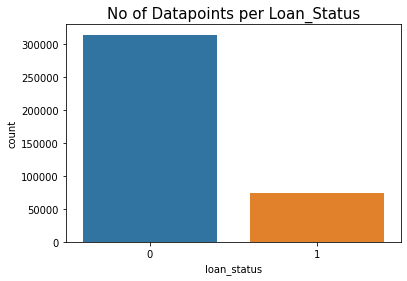

In [ ]:
#Count for each labels
plt.title('No of Datapoints per Loan_Status', fontsize=15)
sns.countplot(df.loan_status)
plt.xticks()
plt.show()

In [ ]:
Y = df['loan_status']
df = df.drop(columns=['loan_status'])

In [ ]:
df['loan_status'] = Y

In [ ]:
#perform the train test split.
X_train, X_test,Y_train, Y_test = train_test_split(df, Y, stratify = Y, train_size = 0.8)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, stratify = Y_train, train_size = 0.8)

In [ ]:
#Featurize the title and emp_title features.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_title = CountVectorizer(max_features = 10)
X_train_title = vectorizer_title.fit_transform(X_train['title'])
X_cv_title = vectorizer_title.transform(X_cv['title'])
X_test_title = vectorizer_title.transform(X_test['title'])


vectorizer_emp_title = CountVectorizer(max_features = 20)
X_train_emp_title = vectorizer_emp_title.fit_transform(X_train['emp_title'])
X_cv_emp_title = vectorizer_emp_title.transform(X_cv['emp_title'])
X_test_emp_title = vectorizer_emp_title.transform(X_test['emp_title'])


In [ ]:
type(X_train_title)

scipy.sparse.csr.csr_matrix

In [ ]:
term = np.array(X_train['term']).reshape((len(X_train['term']),1))
batch_enrolled = np.array(X_train['batch_enrolled']).reshape((len(X_train['batch_enrolled']),1))
grade = np.array(X_train['grade']).reshape((len(X_train['grade']),1))
sub_grade = np.array(X_train['sub_grade']).reshape((len(X_train['sub_grade']),1))
emp_length = np.array(X_train['emp_length']).reshape((len(X_train['emp_length']),1))
home_ownership = np.array(X_train['home_ownership']).reshape((len(X_train['home_ownership']),1))
verification_status = np.array(X_train['verification_status']).reshape((len(X_train['verification_status']),1))
pymnt_plan = np.array(X_train['pymnt_plan']).reshape((len(X_train['pymnt_plan']),1))
purpose = np.array(X_train['purpose']).reshape((len(X_train['purpose']),1))
zip_code = np.array(X_train['zip_code']).reshape((len(X_train['zip_code']),1))
addr_state = np.array(X_train['addr_state']).reshape((len(X_train['addr_state']),1))
application_type = np.array(X_train['application_type']).reshape((len(X_train['application_type']),1))
#verification_status_joint = np.array(X_train['verification_status_joint']).reshape((len(X_train['verification_status_joint']),1))
initial_list_status = np.array(X_train['initial_list_status']).reshape((len(X_train['initial_list_status']),1))
last_week_pay = np.array(X_train['last_week_pay']).reshape((len(X_train['last_week_pay']),1))
#descr = np.array(X_train['desc']).reshape((len(X_train['desc']),1))

term_cv = np.array(X_cv['term']).reshape((len(X_cv['term']),1))
batch_enrolled_cv = np.array(X_cv['batch_enrolled']).reshape((len(X_cv['batch_enrolled']),1))
grade_cv = np.array(X_cv['grade']).reshape((len(X_cv['grade']),1))
sub_grade_cv = np.array(X_cv['sub_grade']).reshape((len(X_cv['sub_grade']),1))
emp_length_cv = np.array(X_cv['emp_length']).reshape((len(X_cv['emp_length']),1))
home_ownership_cv = np.array(X_cv['home_ownership']).reshape((len(X_cv['home_ownership']),1))
verification_status_cv = np.array(X_cv['verification_status']).reshape((len(X_cv['verification_status']),1))
pymnt_plan_cv = np.array(X_cv['pymnt_plan']).reshape((len(X_cv['pymnt_plan']),1))
purpose_cv = np.array(X_cv['purpose']).reshape((len(X_cv['purpose']),1))
zip_code_cv = np.array(X_cv['zip_code']).reshape((len(X_cv['zip_code']),1))
addr_state_cv = np.array(X_cv['addr_state']).reshape((len(X_cv['addr_state']),1))
application_type_cv = np.array(X_cv['application_type']).reshape((len(X_cv['application_type']),1))
#verification_status_joint_cv = np.array(X_cv['verification_status_joint']).reshape((len(X_cv['verification_status_joint']),1))
initial_list_status_cv = np.array(X_cv['initial_list_status']).reshape((len(X_cv['initial_list_status']),1))
last_week_pay_cv = np.array(X_cv['last_week_pay']).reshape((len(X_cv['last_week_pay']),1))
#descr_cv = np.array(X_cv['desc']).reshape((len(X_cv['desc']),1))


term_test = np.array(X_test['term']).reshape((len(X_test['term']),1))
batch_enrolled_test = np.array(X_test['batch_enrolled']).reshape((len(X_test['batch_enrolled']),1))
grade_test = np.array(X_test['grade']).reshape((len(X_test['grade']),1))
sub_grade_test = np.array(X_test['sub_grade']).reshape((len(X_test['sub_grade']),1))
emp_length_test = np.array(X_test['emp_length']).reshape((len(X_test['emp_length']),1))
home_ownership_test = np.array(X_test['home_ownership']).reshape((len(X_test['home_ownership']),1))
verification_status_test = np.array(X_test['verification_status']).reshape((len(X_test['verification_status']),1))
pymnt_plan_test = np.array(X_test['pymnt_plan']).reshape((len(X_test['pymnt_plan']),1))
purpose_test = np.array(X_test['purpose']).reshape((len(X_test['purpose']),1))
zip_code_test = np.array(X_test['zip_code']).reshape((len(X_test['zip_code']),1))
addr_state_test = np.array(X_test['addr_state']).reshape((len(X_test['addr_state']),1))
application_type_test = np.array(X_test['application_type']).reshape((len(X_test['application_type']),1))
#verification_status_joint_test = np.array(X_test['verification_status_joint']).reshape((len(X_test['verification_status_joint']),1))
initial_list_status_test = np.array(X_test['initial_list_status']).reshape((len(X_test['initial_list_status']),1))
last_week_pay_test = np.array(X_test['last_week_pay']).reshape((len(X_test['last_week_pay']),1))
#descr_test = np.array(X_test['desc']).reshape((len(X_test['desc']),1))


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe_term = OneHotEncoder(sparse=False, handle_unknown='ignore')
term = ohe_term.fit_transform(term)
term_cv = ohe_term.transform(term_cv)
term_test = ohe_term.transform(term_test)

ohe_batch_enrolled = OneHotEncoder(sparse=False, handle_unknown='ignore')
batch_enrolled = ohe_batch_enrolled.fit_transform(batch_enrolled)
batch_enrolled_cv = ohe_batch_enrolled.transform(batch_enrolled_cv)
batch_enrolled_test = ohe_batch_enrolled.transform(batch_enrolled_test)

ohe_grade = OneHotEncoder(sparse=False, handle_unknown='ignore')
grade = ohe_grade.fit_transform(grade)
grade_cv = ohe_grade.transform(grade_cv)
grade_test = ohe_grade.transform(grade_test)

ohe_sub_grade = OneHotEncoder(sparse=False, handle_unknown='ignore')
sub_grade = ohe_sub_grade.fit_transform(sub_grade)
sub_grade_cv = ohe_sub_grade.transform(sub_grade_cv)
sub_grade_test = ohe_sub_grade.transform(sub_grade_test)

ohe_emp_length = OneHotEncoder(sparse=False, handle_unknown='ignore')
emp_length = ohe_emp_length.fit_transform(emp_length)
emp_length_cv = ohe_emp_length.transform(emp_length_cv)
emp_length_test = ohe_emp_length.transform(emp_length_test)

ohe_home_ownership = OneHotEncoder(sparse=False, handle_unknown='ignore')
home_ownership = ohe_home_ownership.fit_transform(home_ownership)
home_ownership_cv = ohe_home_ownership.transform(home_ownership_cv)
home_ownership_test = ohe_home_ownership.transform(home_ownership_test)

ohe_verification_status = OneHotEncoder(sparse=False, handle_unknown='ignore')
verification_status = ohe_verification_status.fit_transform(verification_status)
verification_status_cv = ohe_verification_status.transform(verification_status_cv)
verification_status_test = ohe_verification_status.transform(verification_status_test)

ohe_pymnt_plan = OneHotEncoder(sparse=False, handle_unknown='ignore')
pymnt_plan = ohe_pymnt_plan.fit_transform(pymnt_plan)
pymnt_plan_cv = ohe_pymnt_plan.transform(pymnt_plan_cv)
pymnt_plan_test = ohe_pymnt_plan.transform(pymnt_plan_test)

ohe_purpose = OneHotEncoder(sparse=False, handle_unknown='ignore')
purpose = ohe_purpose.fit_transform(purpose)
purpose_cv = ohe_purpose.transform(purpose_cv)
purpose_test = ohe_purpose.transform(purpose_test)

ohe_zip_code = OneHotEncoder(sparse=False, handle_unknown='ignore')
zip_code = ohe_zip_code.fit_transform(zip_code)
zip_code_cv = ohe_zip_code.transform(zip_code_cv)
zip_code_test = ohe_zip_code.transform(zip_code_test)

ohe_addr_state = OneHotEncoder(sparse=False, handle_unknown='ignore')
addr_state = ohe_addr_state.fit_transform(addr_state)
addr_state_cv = ohe_addr_state.transform(addr_state_cv)
addr_state_test = ohe_addr_state.transform(addr_state_test)

ohe_application_type = OneHotEncoder(sparse=False, handle_unknown='ignore')
application_type = ohe_application_type.fit_transform(application_type)
application_type_cv = ohe_application_type.transform(application_type_cv)
application_type_test = ohe_application_type.transform(application_type_test)


ohe_initial_list_status = OneHotEncoder(sparse=False, handle_unknown='ignore')
initial_list_status = ohe_initial_list_status.fit_transform(initial_list_status)
initial_list_status_cv = ohe_initial_list_status.transform(initial_list_status_cv)
initial_list_status_test = ohe_initial_list_status.transform(initial_list_status_test)

ohe_last_week_pay = OneHotEncoder(sparse=False, handle_unknown='ignore')
last_week_pay = ohe_last_week_pay.fit_transform(last_week_pay)
last_week_pay_cv = ohe_last_week_pay.transform(last_week_pay_cv)
last_week_pay_test = ohe_last_week_pay.transform(last_week_pay_test)

In [ ]:
train = X_train[['funded_amnt_inv',
       'int_rate',
        'annual_inc', 
       'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc',  'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 
        
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       ]]

cv = X_cv[['funded_amnt_inv',
       'int_rate',
        'annual_inc', 
       'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc',  'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 
       
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       ]]

test = X_test[['funded_amnt_inv',
       'int_rate',
        'annual_inc', 
       'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc',  'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 
        
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       ]]

In [ ]:
X_train_title = X_train_title.toarray()
X_train_emp_title = X_train_emp_title.toarray()

In [ ]:
X_cv_title = X_cv_title.toarray()
X_cv_emp_title = X_cv_emp_title.toarray()

In [ ]:
X_test_title = X_test_title.toarray()
X_test_emp_title = X_test_emp_title.toarray()

In [ ]:
#title, emp_title included
cat = np.concatenate((term,batch_enrolled,grade,sub_grade,emp_length,home_ownership, verification_status, pymnt_plan, purpose, zip_code, addr_state, application_type, initial_list_status,last_week_pay, X_train_title, X_train_emp_title ), axis=1)
cat_cv = np.concatenate((term_cv,batch_enrolled_cv,grade_cv,sub_grade_cv,emp_length_cv,home_ownership_cv,verification_status_cv, pymnt_plan_cv, purpose_cv, zip_code_cv, addr_state_cv, application_type_cv, initial_list_status_cv,last_week_pay_cv, X_cv_title, X_cv_emp_title ), axis=1)
cat_test = np.concatenate((term_test,batch_enrolled_test,grade_test,sub_grade_test,emp_length_test,home_ownership_test, verification_status_test, pymnt_plan_test, purpose_test, zip_code_test, addr_state_test, application_type_test, initial_list_status_test,last_week_pay_test, X_test_title, X_test_emp_title ), axis=1)

In [ ]:

cat = np.concatenate((term,batch_enrolled,grade,sub_grade,emp_length,home_ownership, verification_status, pymnt_plan, purpose, zip_code, addr_state, application_type, initial_list_status,last_week_pay ), axis=1)
cat_cv = np.concatenate((term_cv,batch_enrolled_cv,grade_cv,sub_grade_cv,emp_length_cv,home_ownership_cv,verification_status_cv, pymnt_plan_cv, purpose_cv, zip_code_cv, addr_state_cv, application_type_cv, initial_list_status_cv,last_week_pay_cv ), axis=1)
cat_test = np.concatenate((term_test,batch_enrolled_test,grade_test,sub_grade_test,emp_length_test,home_ownership_test, verification_status_test, pymnt_plan_test, purpose_test, zip_code_test, addr_state_test, application_type_test, initial_list_status_test,last_week_pay_test ), axis=1)

In [ ]:
tr_ = np.concatenate((train,cat), axis =1)
cv_ = np.concatenate((cv,cat_cv), axis =1)
ts_ = np.concatenate((test,cat_test), axis =1)

In [ ]:
label = to_categorical(Y_train)
label_cv = to_categorical(Y_cv)
label_test = to_categorical(Y_test)

In [ ]:
#Model

n_hidden1 = 64
n_hidden2 = 48
epochs = 20
n_classes = 2
batch_size = 32
# Initiliazing the sequential model
model = keras.Sequential()

# Configuring the parameters
model.add(layers.Dense(n_hidden2, activation='relu', input_shape=(tr_.shape[1],), kernel_initializer='glorot_normal'))

# Configuring the parameters
model.add(layers.Dense(n_hidden2, activation='relu', kernel_initializer='glorot_normal'))

# Adding a dropout layer
model.add(layers.Dropout(0.3))


# Adding a dense output layer with relu activation
model.add(layers.Dense(n_hidden1, activation='relu', kernel_initializer='he_normal'))

# Adding a dropout layer
model.add(layers.Dropout(0.3))

# Adding a dense output layer with softmax activation
model.add(layers.Dense(2, activation='softmax'))

print (model.summary())

auc = tf.keras.metrics.AUC()

# Compiling the model
model.compile(loss= 'binary_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.AUC(100)])

# Training the model
model.fit(tr_,
          label,
          batch_size=batch_size,
          validation_data=(cv_, label_cv),
          epochs=5)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 48)                18480     
_________________________________________________________________
dense_9 (Dense)              (None, 48)                2352      
_________________________________________________________________
dropout_4 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                3136      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 130       
Total params: 24,098
Trainable params: 24,098
Non-trainable params: 0
__________________________________________________

In [ ]:
y = model.predict(ts_)

In [ ]:
count = 0
for i in range(y.shape[0]):
  if y[i][0] < y [i][1]:
    count+=1
    print(i)
count

58245


1

In [ ]:
print(y[58245])

[0. 1.]


## Random Forest on cleaned data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV


rf=RandomForestClassifier(min_samples_split=20)
parameters={'n_estimators': [100], 'max_depth': [8]}

clf=GridSearchCV(rf,parameters,scoring='roc_auc',return_train_score='True')
clf.fit(tr_,Y_train)



GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=20,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [ ]:
clf.best_score_

0.783723537342533

In [ ]:
yy = clf.predict_proba(ts_)

In [ ]:
count=0
for i in range(yy.shape[0]):
  if yy[i] > 0:
    count+=1
count

623

In [ ]:
yy

array([[0.8160419 , 0.1839581 ],
       [0.81009629, 0.18990371],
       [0.78654725, 0.21345275],
       ...,
       [0.78804332, 0.21195668],
       [0.83078201, 0.16921799],
       [0.85137311, 0.14862689]])

## XGBoost on Cleaned Data

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

xgb=XGBClassifier()
parameters={'n_estimators': [100], 'max_depth': [3]}

clf=GridSearchCV(xgb,parameters,scoring='roc_auc',return_train_score='True')
clf.fit(tr_,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3], 'n_estimators': [100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='True',
             scoring='roc_auc'

In [ ]:
clf.best_score_

0.8588131927963533

In [ ]:
yyz = clf.predict(ts_)

In [ ]:
yyz

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
count=0
for i in range(yyz.shape[0]):
  if yyz[i] > 0:
    count+=1
count

2860

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, clf.predict(ts_))



0.5842866618907373

In [ ]:
ts_.shape

(77590, 353)

## Inference

1. Deep Learning model were biased towards class 0
2. Due to the structure of the data, it was not possible to to train the good deep learning models. I tried both with cleaning the data and without cleaning (filling the empty values accordingly).
3. Classical ML algorithms were performing better here than Deep Learning Model.
4. They were able to predict the class 1 with the unseen data. Among the two, XGBoost was able to predict more datapoints with class 1. 
5. So the submission is made by predicting the points on test_indessa.csv using XGBoost classifier.


##Submission


In [ ]:
df_ts = pd.read_csv("test_indessa.csv")


In [ ]:
df_ts = df_ts.drop(columns=['mths_since_last_delinq', 'desc', 'mths_since_last_record', 'mths_since_last_major_derog', 'verification_status_joint', 'mths_since_last_delinq' ])

In [ ]:
dss = df_ts

In [ ]:
# using dropna() function  we drop the rows with atleast one null value in the row
dss = dss.dropna()

In [ ]:
dss = dss.drop(columns = ['loan_amnt','funded_amnt'])

In [ ]:
id = dss['member_id']

In [ ]:
dss = dss.drop(columns = ['member_id'])

In [2]:
#Featurize the title and emp_title features.

test_title_ = vectorizer_title.transform(dss['title'])
test_emp_title_ = vectorizer_emp_title.transform(dss['emp_title'])

"\ntest_title_ = vectorizer_title.transform(dss['title'])\n\n\n\ntest_emp_title_ = vectorizer_emp_title.transform(dss['emp_title'])\n"

In [ ]:
_term = np.array(dss['term']).reshape((len(dss['term']),1))
_batch_enrolled = np.array(dss['batch_enrolled']).reshape((len(dss['batch_enrolled']),1))
_grade = np.array(dss['grade']).reshape((len(dss['grade']),1))
_sub_grade = np.array(dss['sub_grade']).reshape((len(dss['sub_grade']),1))
_emp_length = np.array(dss['emp_length']).reshape((len(dss['emp_length']),1))
_home_ownership = np.array(dss['home_ownership']).reshape((len(dss['home_ownership']),1))
_verification_status = np.array(dss['verification_status']).reshape((len(dss['verification_status']),1))
_pymnt_plan = np.array(dss['pymnt_plan']).reshape((len(dss['pymnt_plan']),1))
_purpose = np.array(dss['purpose']).reshape((len(dss['purpose']),1))
_zip_code = np.array(dss['zip_code']).reshape((len(dss['zip_code']),1))
_addr_state = np.array(dss['addr_state']).reshape((len(dss['addr_state']),1))
_application_type = np.array(dss['application_type']).reshape((len(dss['application_type']),1))
#verification_status_joint = np.array(dss['verification_status_joint']).reshape((len(dss['verification_status_joint']),1))
_initial_list_status = np.array(dss['initial_list_status']).reshape((len(dss['initial_list_status']),1))
_last_week_pay = np.array(dss['last_week_pay']).reshape((len(dss['last_week_pay']),1))

In [ ]:
from sklearn.preprocessing import OneHotEncoder

_term = ohe_term.transform(_term)
_batch_enrolled = ohe_batch_enrolled.transform(_batch_enrolled)
_grade = ohe_grade.transform(_grade)
_sub_grade = ohe_sub_grade.transform(_sub_grade)
_emp_length = ohe_emp_length.transform(_emp_length)
_home_ownership = ohe_home_ownership.transform(_home_ownership)
_verification_status = ohe_verification_status.transform(_verification_status)
_pymnt_plan = ohe_pymnt_plan.transform(_pymnt_plan)
_purpose = ohe_purpose.transform(_purpose)
_zip_code = ohe_zip_code.transform(_zip_code)
_addr_state = ohe_addr_state.transform(_addr_state)
_application_type = ohe_application_type.transform(_application_type)
_initial_list_status = ohe_initial_list_status.transform(_initial_list_status)
_last_week_pay = ohe_last_week_pay.transform(_last_week_pay)

In [ ]:
_dss = dss[['funded_amnt_inv',
       'int_rate',
        'annual_inc', 
       'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc',  'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 
        
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       ]]

In [ ]:

_cat = np.concatenate((_term,_batch_enrolled,_grade,_sub_grade,_emp_length,_home_ownership, _verification_status, _pymnt_plan, _purpose, _zip_code, _addr_state, _application_type, _initial_list_status,_last_week_pay ), axis=1)

In [ ]:
_ts = np.concatenate((_dss,_cat), axis =1)

In [ ]:
predict = clf.predict_proba(_ts)
predict

array([[0.8467694 , 0.15323061],
       [0.8831335 , 0.11686654],
       [0.84731436, 0.15268564],
       ...,
       [0.7916175 , 0.20838247],
       [0.71613693, 0.28386304],
       [0.79420036, 0.20579964]], dtype=float32)

In [ ]:
prob = []
for i in range(predict.shape[0]):
  prob.append(predict[i][1])


In [ ]:
subm = pd.DataFrame()


In [ ]:
subm['member_id'] = id

In [ ]:
subm['probability of being defaulter'] = prob

In [ ]:
subm.head(50)

,member_id,probability of being defaulter
0,11937648,0.153231
1,38983318,0.116867
2,27999917,0.152686
3,61514932,0.173115
4,59622821,0.187859
5,28822038,0.110019
6,10718089,0.192196
7,58114582,0.245384
8,35023176,0.235314
10,15559751,0.288338
